<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.310182,36.673443,99.661162,80.141580,265.649847,591.436213,617.085622,-25.649409
1,0.0,1.0,93.464743,49.314954,62.267993,35.613421,225.652675,476.313785,266.178761,210.135024
2,0.0,2.0,82.626574,81.416933,70.280345,64.845462,-194.433437,114.735876,257.654085,-142.918208
3,0.0,3.0,32.575001,86.054245,33.767558,46.468820,-172.457858,36.407765,-152.686343,189.094108
4,0.0,4.0,38.442152,40.092782,99.836525,27.450886,150.141907,365.964252,247.201066,118.763186
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.073783,92.979431,47.169511,33.238915,-199.651090,39.810549,177.521608,-137.711058
119996,999.0,116.0,89.195142,59.192875,90.919048,77.441280,422.660958,749.409303,223.962302,525.447001
119997,999.0,117.0,79.702994,35.300770,75.280521,87.397046,234.211365,521.892697,236.753576,285.139121
119998,999.0,118.0,65.962105,77.568561,96.182533,90.988130,-277.352654,63.348676,200.821836,-137.473160


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    99.310182  36.673443  99.661162  80.141580   265.649847   
      1.0    93.464743  49.314954  62.267993  35.613421   225.652675   
      2.0    82.626574  81.416933  70.280345  64.845462  -194.433437   
      3.0    32.575001  86.054245  33.767558  46.468820  -172.457858   
      4.0    38.442152  40.092782  99.836525  27.450886   150.141907   
...                ...        ...        ...        ...          ...   
999.0 115.0  56.073783  92.979431  47.169511  33.238915  -199.651090   
      116.0  89.195142  59.192875  90.919048  77.441280   422.660958   
      117.0  79.702994  35.300770  75.280521  87.397046   234.211365   
      118.0  65.962105  77.568561  96.182533  90.988130  -277.352654   
      119.0  26.910025  92.627642  45.304544  49.473436 -1277.683853   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     591.436213  617.085622   -25.649409  
      1.0     476.313785  266.178761   210.135024  
      2.0     114.735876  257.654085  -142.918208  
      3.0      36.407765 -152.686343   189.094108  
      4.0     365.964252  247.201066   118.763186  
...                  ...         ...          ...  
999.0 115.0    39.810549  177.521608  -137.711058  
      116.0   749.409303  223.962302   525.447001  
      117.0   521.892697  236.753576   285.139121  
      118.0    63.348676  200.821836  -137.473160  
      119.0 -1053.368207  168.396735 -1221.764942  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    99.310182  36.673443  99.661162  80.141580   265.649847   
      1.0    93.464743  49.314954  62.267993  35.613421   225.652675   
      2.0    82.626574  81.416933  70.280345  64.845462  -194.433437   
      3.0    32.575001  86.054245  33.767558  46.468820  -172.457858   
      4.0    38.442152  40.092782  99.836525  27.450886   150.141907   
...                ...        ...        ...        ...          ...   
999.0 115.0  56.073783  92.979431  47.169511  33.238915  -199.651090   
      116.0  89.195142  59.192875  90.919048  77.441280   422.660958   
      117.0  79.702994  35.300770  75.280521  87.397046   234.211365   
      118.0  65.962105  77.568561  96.182533  90.988130  -277.352654   
      119.0  26.910025  92.627642  45.304544  49.473436 -1277.683853   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     591.436213  617.085622   -25.649409  
      1.0     476.313785  266.178761   210.135024  
      2.0     114.735876  257.654085  -142.918208  
      3.0      36.407765 -152.686343   189.094108  
      4.0     365.964252  247.201066   118.763186  
...                  ...         ...          ...  
999.0 115.0    39.810549  177.521608  -137.711058  
      116.0   749.409303  223.962302   525.447001  
      117.0   521.892697  236.753576   285.139121  
      118.0    63.348676  200.821836  -137.473160  
      119.0 -1053.368207  168.396735 -1221.764942  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.310182,36.673443,99.661162,80.141580,265.649847,591.436213,617.085622,-25.649409
1,0.0,1.0,93.464743,49.314954,62.267993,35.613421,225.652675,476.313785,266.178761,210.135024
2,0.0,2.0,82.626574,81.416933,70.280345,64.845462,-194.433437,114.735876,257.654085,-142.918208
3,0.0,3.0,32.575001,86.054245,33.767558,46.468820,-172.457858,36.407765,-152.686343,189.094108
4,0.0,4.0,38.442152,40.092782,99.836525,27.450886,150.141907,365.964252,247.201066,118.763186
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.073783,92.979431,47.169511,33.238915,-199.651090,39.810549,177.521608,-137.711058
119996,999.0,116.0,89.195142,59.192875,90.919048,77.441280,422.660958,749.409303,223.962302,525.447001
119997,999.0,117.0,79.702994,35.300770,75.280521,87.397046,234.211365,521.892697,236.753576,285.139121
119998,999.0,118.0,65.962105,77.568561,96.182533,90.988130,-277.352654,63.348676,200.821836,-137.473160


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    99.310182  36.673443  99.661162  80.141580   265.649847   
      1.0    93.464743  49.314954  62.267993  35.613421   225.652675   
      2.0    82.626574  81.416933  70.280345  64.845462  -194.433437   
      3.0    32.575001  86.054245  33.767558  46.468820  -172.457858   
      4.0    38.442152  40.092782  99.836525  27.450886   150.141907   
...                ...        ...        ...        ...          ...   
999.0 115.0  56.073783  92.979431  47.169511  33.238915  -199.651090   
      116.0  89.195142  59.192875  90.919048  77.441280   422.660958   
      117.0  79.702994  35.300770  75.280521  87.397046   234.211365   
      118.0  65.962105  77.568561  96.182533  90.988130  -277.352654   
      119.0  26.910025  92.627642  45.304544  49.473436 -1277.683853   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     591.436213  617.085622   -25.649409  
      1.0     476.313785  266.178761   210.135024  
      2.0     114.735876  257.654085  -142.918208  
      3.0      36.407765 -152.686343   189.094108  
      4.0     365.964252  247.201066   118.763186  
...                  ...         ...          ...  
999.0 115.0    39.810549  177.521608  -137.711058  
      116.0   749.409303  223.962302   525.447001  
      117.0   521.892697  236.753576   285.139121  
      118.0    63.348676  200.821836  -137.473160  
      119.0 -1053.368207  168.396735 -1221.764942  

[120000 rows x 8 columns]

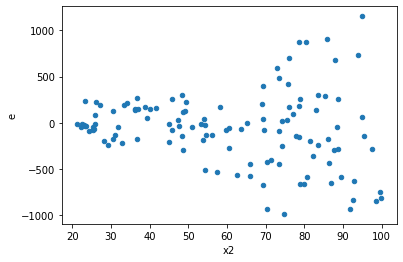

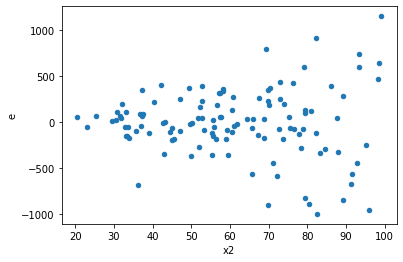

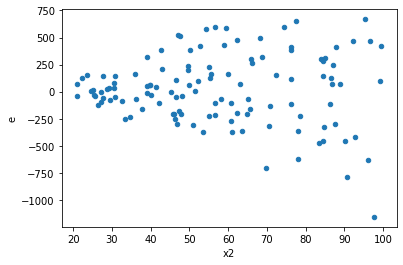

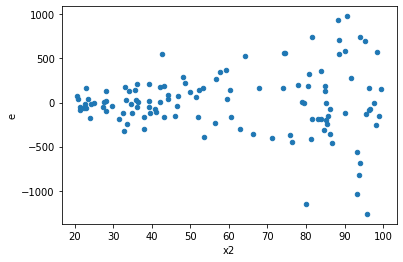

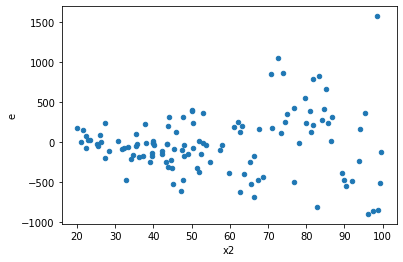

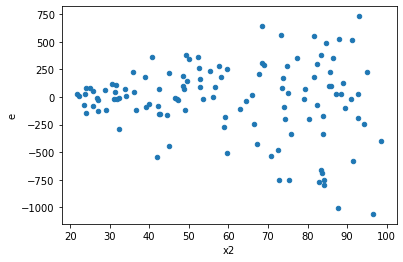

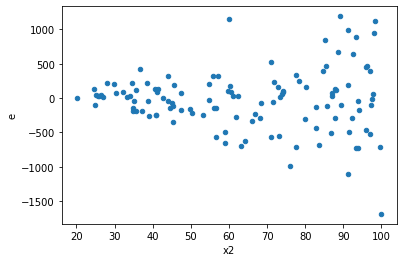

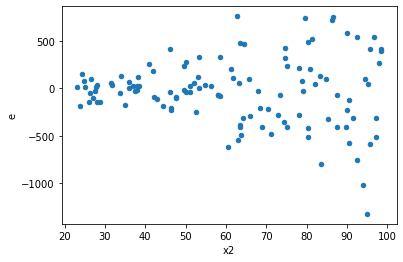

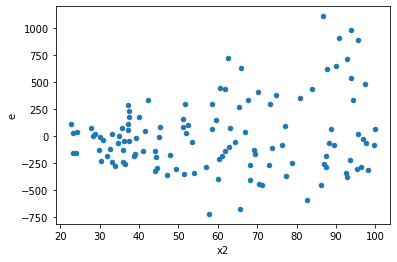

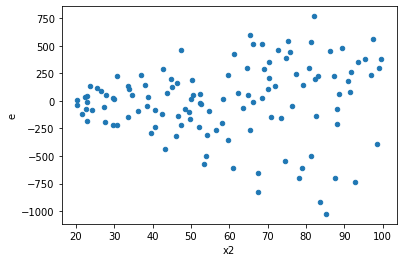

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,68.0,44.0,8890413.979145946,6461414.8034440335,130741.38204626391,146850.33644190987,1.1232123612548754,0.6882200566005157,0.6558899716997422,0.34411002830025783,Reject001=1 : Homoscedasticity
2.0,56.0,56.0,4294614.88494588,6764771.7204165775,76689.55151689071,120799.49500743889,1.5751754002738307,0.09192143043452305,0.9540392847827385,0.04596071521726153,Reject001=1 : Homoscedasticity
3.0,57.0,55.0,5273639.403569398,9131731.240819199,92519.98953630523,166031.4771058036,1.7945470804517565,0.030972375027837673,0.9845138124860812,0.015486187513918837,Reject001=1 : Homoscedasticity
6.0,40.0,72.0,5676011.48620458,16142965.273237698,141900.28715511452,224207.85101719026,1.580038035949169,0.09129501607264712,0.9543524919636764,0.04564750803632356,Reject001=1 : Homoscedasticity
8.0,48.0,64.0,1880479.961096436,10735030.711809047,39176.66585617575,167734.85487201635,4.281498979208688,9.711494564079715e-08,0.9999999514425272,4.855747282039857e-08,Reject001=0 : Heteroscedasticity
10.0,43.0,69.0,4146330.9712664876,6997261.011724185,96426.30165736018,101409.57988006066,1.0516796572828022,0.8381853594834219,0.5809073202582891,0.41909267974171094,Reject001=1 : Homoscedasticity
12.0,59.0,53.0,8155159.312949938,8647383.804481518,138223.03920254132,163158.1849902173,1.1803978984367285,0.5412960287128481,0.729351985643576,0.27064801435642405,Reject001=1 : Homoscedasticity
14.0,55.0,57.0,4653656.466344378,10688543.645262752,84611.93575171597,187518.3095660132,2.216215808089584,0.0033400480853589265,0.9983299759573205,0.0016700240426794632,Reject001=0 : Heteroscedasticity
16.0,59.0,53.0,5455715.513450638,9452194.8875091,92469.75446526505,178343.29976432264,1.9286663060332312,0.01624690641471127,0.9918765467926444,0.008123453207355635,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,68.0,44.0,8890413.979145946,6461414.8034440335,130741.38204626391,146850.33644190987,1.1232123612548754,0.6882200566005157,Reject001=1 : Homoscedasticity
1.0,65.0,47.0,8869955.947114572,5187608.152664929,136460.86072483956,110374.64154606231,0.8088373542405126,0.42472983057667146,Reject001=1 : Homoscedasticity
2.0,56.0,56.0,4294614.88494588,6764771.7204165775,76689.55151689071,120799.49500743889,1.5751754002738307,0.09192143043452305,Reject001=1 : Homoscedasticity
3.0,57.0,55.0,5273639.403569398,9131731.240819199,92519.98953630523,166031.4771058036,1.7945470804517565,0.030972375027837673,Reject001=1 : Homoscedasticity
4.0,54.0,58.0,9853075.615061082,6033971.323455933,182464.36324187188,104033.98833544711,0.5701605863581224,0.03863263751806998,Reject001=1 : Homoscedasticity
5.0,50.0,62.0,7253612.68394621,4808925.48570908,145072.2536789242,77563.31428563032,0.5346529906214489,0.02344126418551869,Reject001=1 : Homoscedasticity
6.0,40.0,72.0,5676011.48620458,16142965.273237698,141900.28715511452,224207.85101719026,1.580038035949169,0.09129501607264712,Reject001=1 : Homoscedasticity
7.0,54.0,58.0,7521740.001708198,6287138.350083083,139291.4815131148,108398.93707039798,0.778216556338313,0.35358401123263633,Reject001=1 : Homoscedasticity
8.0,48.0,64.0,1880479.961096436,10735030.711809047,39176.66585617575,167734.85487201635,4.281498979208688,9.711494564079715e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      560
Reject001=0 : Heteroscedasticity    440
Name: Result_test, dtype: int64